<a href="https://colab.research.google.com/github/vivekvardhan30/AIML-LAB/blob/main/LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implement K-Means Clustering using Synthetic Data**

import libraries and load data

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #plot styling
%matplotlib inline

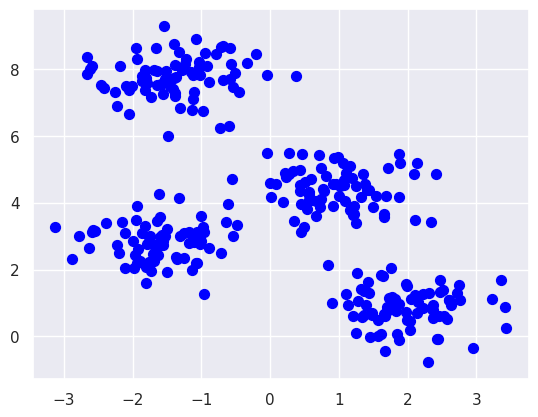

In [ ]:
from sklearn.datasets import make_blobs
X, y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.60,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50,color='blue')

Import K-Means from Sklearn and Fit the data

In [ ]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,n_init=10)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)

Visualize the fitted data by coloring <br>
the blobs by assigned label numbers

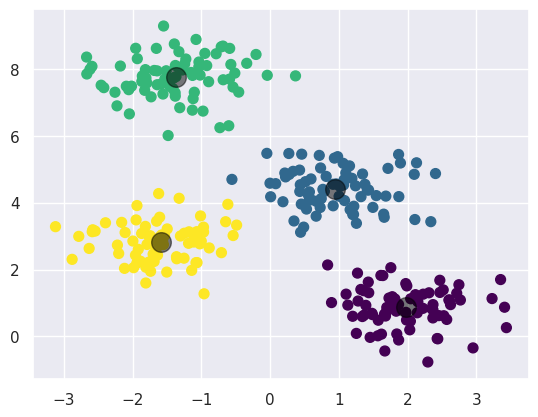

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

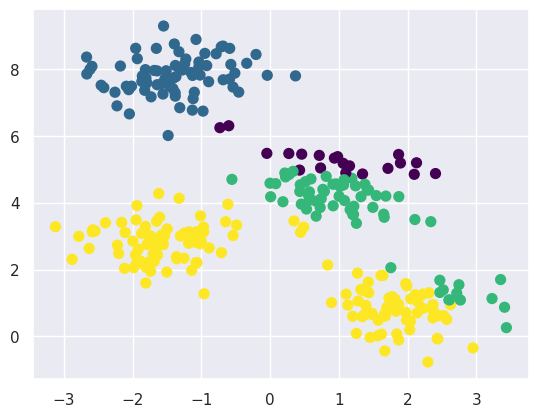

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
# 1. Randomly choose clusters
  rng = np.random.RandomState(rseed)
  i = rng.permutation(X.shape[0])[:n_clusters]
  centers = X[i]
  while True:
# 2a. Assign labels based on closest center
    labels = pairwise_distances_argmin(X, centers)
# 2b. Find new centers from means of points
    new_centers = np.array([X[labels == i].mean(0)
    for i in range(n_clusters)])
# 2c. Check for convergence
    if np.all(centers == new_centers):
      break
    centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

Limitations of K-Means Algorithm

In [ ]:
from sklearn.datasets import make_moons
X,y=make_moons(200,noise=.05,random_state=0)

TypeError: float() argument must be a string or a real number, not 'method'

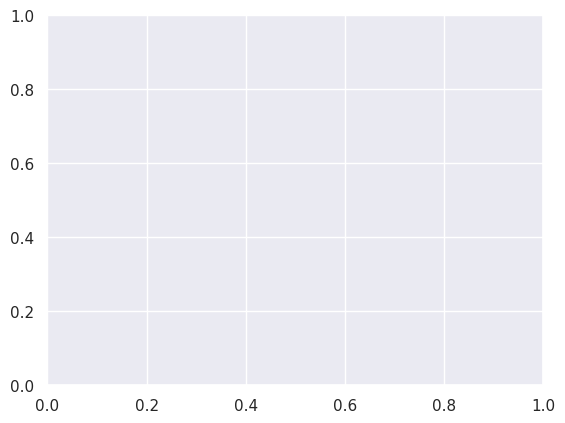

In [ ]:
labels=KMeans(2,random_state=0,n_init=10).fit_predict
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')